Densenet发表于2016年，在resnet的基础上继续探索residual学习。Densenet与resnet的不同之处主要体现在：<br/>
1)	resnet中的residual block只与前一层连接，densenet中的dense block与之前的所有层连接；<br/>
2)	residual block执行add操作，dense block执行concat操作。<br/>
Densenet优点包括：缓解了梯度消失问题，特征重用，减少了参数量。


作者首先介绍了应用短路连接的文章，随后指出在dense中要最大程度地利用信息流，因此将所有的层连接至其后的所有层，如下图所示，与resnet不同，不采用add操作，而是concat操作。
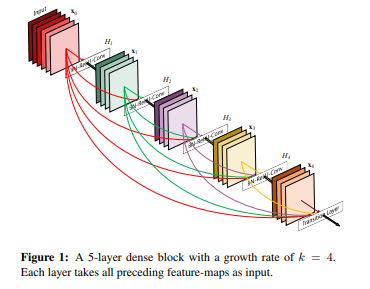

dense connection一个反直觉的作用是相对于传统的网络，它需要更少的参数，因为特征重用，不需要学习冗余参数。resnet的参数量大是因为每层都是它自己的参数，而densenet在每层只有少部分维度的专有参数。

densenet的另一大优点是信息流与梯度流比较先进，因此训练较容易。且作者观察到densenet有一定的正则化作用。

公式推导：<br/>
$令单张图像输入为x_0，网络包含L层，非线性变换为H_l()，l表示第l层，\\H_l可以是BN、ReLU或pooing、conv的组合。第l层的输出为x_l$<br/>
$Resnets：x_l = H_l(x_{l-1}) + x_{l-1}.Resnets的优点是梯度可以直接从后面的层传至较前面的层，\\但add操作阻碍了信息流的传播$<br/>
$densenets:x_l = H_l([x_0, x_1, ...,x_{l-1}])，其中[x_0, x_1, ...,x_{l-1}]表示concat操作$

复合函数：$将H_l定义为BN、ReLU、3x3 conv的复合函数$

pooling层：为了执行doen-sampling操作，我们将网络分解为多个dense block，如下图所示。
dense block之间的层成为transition层，由BN、1x1卷积与2x2的avgpooling组成。
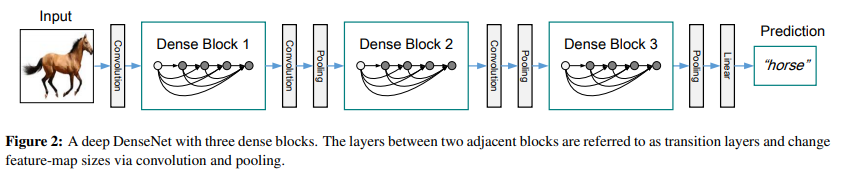

$growth rate:如果每个H_l产生k个特征图，那么第l层的输出就有k_0 + k * (l-1)个维度，\\其中k_0为输入维度。我们称k为growth rate。\\一般一个较小的growth rate就能训练目前的大多数数据集。\\ growth rate是指每层添加的独有的特征图的维数。$

$bottleneck layers:1x1卷积通常用于降维，本文将BN-ReLU-Conv(1×1) \\ -BN-ReLU-Conv(3×3)的H_l结构称为DenseNet-B$

$compression:为了提高模型的压缩性，我们利用transition层减少特征维度。transition层\\输出floor(\theta m)个特征图，其中floor表示向下取整。0 <= \theta <= 1称为压缩率。我们称\theta < 1\\的dense网络为densenet-C，在实验中，我们将\theta设为0.5.此外，同时应用了bottleneck\\与\theta<1的模型称为densenet-BC。$

在Imagenet上实现的densenet如下表所示：
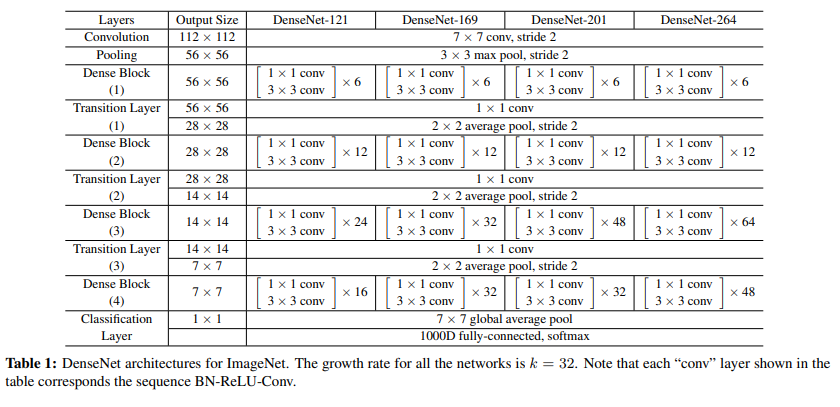